In [1]:
import numpy as np
import pyqsp 
from tqdm import tqdm

from maxtrix_inversion_qsvt import MatrixInversionQSVT, QuantumSolverQSVT
from helpers import *

import matplotlib.pyplot as plt

# Approximate polynomial

In [2]:
# Code taken from https://github.com/ichuang/pyqsp

pg = pyqsp.poly.PolyOneOverX()

# Underlying parameters of inverse approximation.
kappa=3
epsilon=0.01
pcoefs, scale = pg.generate(kappa=kappa, epsilon=epsilon, chebyshev_basis=True, return_scale=True)

# Generate anonymous approximation and ideal function for scaled reciprocal.
inv_fun = lambda x: np.polynomial.chebyshev.chebval(x, pcoefs)
ideal_fun = lambda x: scale*np.reciprocal(x)

poly = pyqsp.angle_sequence.Chebyshev(pcoefs) # Chebyshev decomposition of 1/x
phases = np.array(pyqsp.angle_sequence.QuantumSignalProcessingPhases(poly, signal_operator="Wx", measurement="x")) # QSP phases in the Wx convention

npts = 400
full_range = np.linspace(-1., 1., npts)
D_min = np.linspace(-1., -1/kappa/10, npts//2) 
D_plus = np.linspace(1/kappa/10, 1., npts//2)

# Compute QSP response function directly according to method and convention.
qspr = pyqsp.response.ComputeQSPResponse(full_range,
                                         phases,
                                         signal_operator="Wx",
                                         measurement="x",
                                         sym_qsp=True)

# Generate total response function.
pdat = qspr['pdat']

# Grab the Re and Im parts of QSP unitary top-left matrix element.
re_vals = np.real(pdat)
im_vals = np.imag(pdat)

b=51, j0=22
[PolyOneOverX] minimum [-4.58579384] is at [-0.15726745]: normalizing


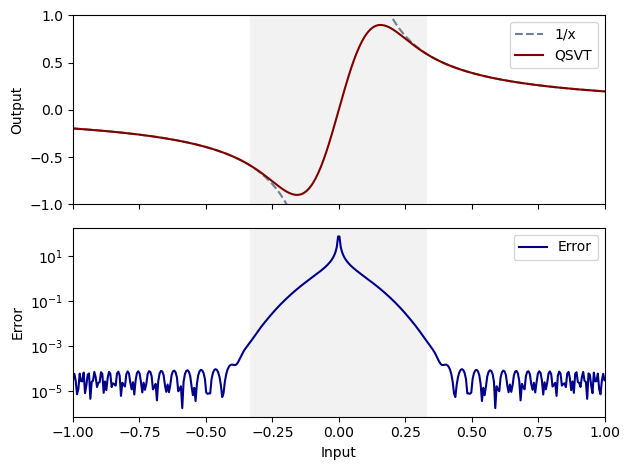

In [3]:
# Define the figure and axes
fig, axs = plt.subplots(2, 1, sharex=True)

# First plot
axs[0].plot(D_min, ideal_fun(D_min), '--', color='slategrey', label='1/x')
axs[0].plot(D_plus, ideal_fun(D_plus), '--', color='slategrey')
axs[0].plot(full_range, re_vals, color='maroon', label='QSVT')
axs[0].set_xlim([-1, 1])
axs[0].set_ylim([-1, 1])
axs[0].set_ylabel('Output')
axs[0].axvspan(-1.0/kappa, 1/kappa, alpha=0.1, color='gray', lw=0)
axs[0].legend()

# Second plot
error = np.abs(ideal_fun(full_range) - re_vals)
axs[1].plot(full_range, error, color='darkblue', label='Error')
axs[1].set_yscale('log')
axs[1].set_xlabel('Input')
axs[1].set_ylabel('Error')
axs[1].axvspan(-1.0/kappa, 1/kappa, alpha=0.1, color='gray', lw=0)
axs[1].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

# Condition number scaling

In [4]:
# Function to generate a random Hermitian matrix of size dim x dim
def generate_random_hermitian(dim):
    A = np.random.standard_normal((dim, dim)) + 1j * np.random.standard_normal((dim, dim))  # Random complex matrix
    return (A + A.conj().T) / 2  # Make it Hermitian
    

# Parameters
dimensions = np.linspace(2, 252, 11, dtype=int)  # Matrix dimensions from 2 to 500
trials_per_dimension = 100

# Store condition numbers for each dimension
condition_numbers_by_dimension = []

for dim in tqdm(dimensions):
    cond_numbers = []
    for _ in range(trials_per_dimension):
        H = generate_random_hermitian(dim)
        cond_number = np.linalg.cond(H)  # Condition number
        cond_numbers.append(cond_number)
    condition_numbers_by_dimension.append(cond_numbers)

100%|██████████| 11/11 [00:08<00:00,  1.32it/s]


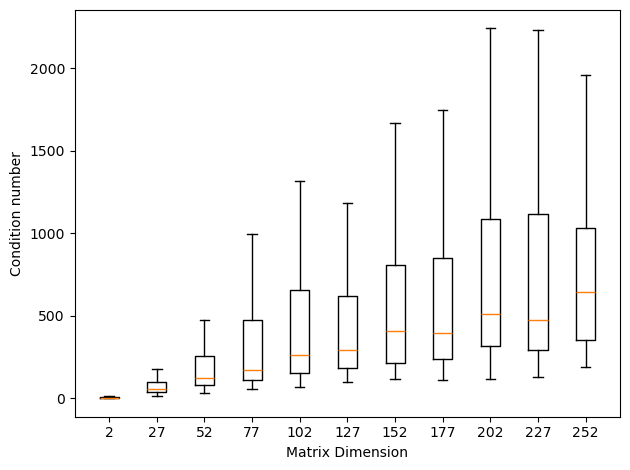

In [5]:
# Plot using boxplots
fig, ax = plt.subplots()

# Create a boxplot for condition numbers grouped by dimension
ax.boxplot(condition_numbers_by_dimension, positions=dimensions, widths=10, showfliers=False)

# Labels and title
ax.set_xlabel('Matrix Dimension')
ax.set_ylabel('Condition number')
# ax.set_xticks(ticks=[2,100,200,300,400,500], labels=[2,100,200,300,400,500])

# Logarithmic scale for better visualization
# ax.set_yscale('log')
# ax.set_xlim(-10,515)

plt.tight_layout()
plt.show()

# Depth Scaling

In [13]:
# Generate data for epsilon plot
pg = pyqsp.poly.PolyOneOverX()
kappa = 2
epsilons = np.geomspace(1e-1, 1e-12, 12)
depths_epsilons = []

for epsilon in epsilons:
    pcoefs, scale = pg.generate(kappa=kappa, epsilon=epsilon, chebyshev_basis=True, return_scale=True)
    poly = pyqsp.angle_sequence.Chebyshev(pcoefs)
    phases = np.array(pyqsp.angle_sequence.QuantumSignalProcessingPhases(poly, signal_operator="Wx", measurement="x"))
    depths_epsilons.append(len(phases))

# Generate data for kappa plot
kappas = np.linspace(1, 10, 10)
depths_kappas = []

for kappa in kappas:
    pcoefs, scale = pg.generate(kappa=kappa, epsilon=1e-1, chebyshev_basis=True, return_scale=True)
    poly = pyqsp.angle_sequence.Chebyshev(pcoefs)
    phases = np.array(pyqsp.angle_sequence.QuantumSignalProcessingPhases(poly, signal_operator="Wx", measurement="x"))
    depths_kappas.append(len(phases))

b=11, j0=8
[PolyOneOverX] minimum [-2.17971299] is at [-0.34096123]: normalizing
b=21, j0=13
[PolyOneOverX] minimum [-2.96921577] is at [-0.24575914]: normalizing
b=30, j0=18
[PolyOneOverX] minimum [-3.53259398] is at [-0.20533021]: normalizing
b=39, j0=23
[PolyOneOverX] minimum [-4.01787559] is at [-0.1799499]: normalizing
b=48, j0=28
[PolyOneOverX] minimum [-4.45060814] is at [-0.16212732]: normalizing
b=58, j0=33
[PolyOneOverX] minimum [-4.8867135] is at [-0.14743733]: normalizing
b=67, j0=38
[PolyOneOverX] minimum [-5.24833027] is at [-0.13714616]: normalizing
b=76, j0=42
[PolyOneOverX] minimum [-5.58659669] is at [-0.12874711]: normalizing
b=85, j0=47
[PolyOneOverX] minimum [-5.90552418] is at [-0.12172345]: normalizing
b=94, j0=52
[PolyOneOverX] minimum [-6.20809252] is at [-0.11573662]: normalizing
b=104, j0=57
[PolyOneOverX] minimum [-6.52785501] is at [-0.11002046]: normalizing
b=113, j0=61
[PolyOneOverX] minimum [-6.80280432] is at [-0.1055401]: normalizing
b=2, j0=2
[PolyOne

<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:13: SyntaxWarning: invalid escape sequence '\p'
<>:15: SyntaxWarning: invalid escape sequence '\k'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:13: SyntaxWarning: invalid escape sequence '\p'
<>:15: SyntaxWarning: invalid escape sequence '\k'
C:\Users\ivash\AppData\Local\Temp\ipykernel_29136\2573571967.py:5: SyntaxWarning: invalid escape sequence '\p'
  axes[0].semilogx(epsilons, depths_epsilons, linestyle='-', alpha=0.3, color='gray', label='Depth $\propto$ $-\log{\epsilon}$')
C:\Users\ivash\AppData\Local\Temp\ipykernel_29136\2573571967.py:9: SyntaxWarning: invalid escape sequence '\e'
  axes[0].set_xlabel('Error ($\epsilon$)')
C:\Users\ivash\AppData\Local\Temp\ipykernel_29136\2573571967.py:13: SyntaxWarning: invalid escape sequence '\p'
  axes[1].plot(kappas, depths_kappas, linestyle='-', alpha=0.3, color='gray', label='Depth

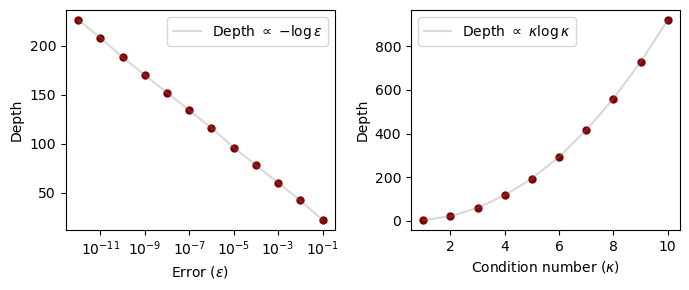

In [19]:
# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(7,3))

# Subplot 1: Epsilons vs. Depths
axes[0].semilogx(epsilons, depths_epsilons, linestyle='-', alpha=0.3, color='gray', label='Depth $\propto$ $-\log{\epsilon}$')
axes[0].scatter(epsilons, depths_epsilons, color='maroon', s=25)
axes[0].legend()

axes[0].set_xlabel('Error ($\epsilon$)')
axes[0].set_ylabel('Depth')

# Subplot 2: Kappas vs. Depths
axes[1].plot(kappas, depths_kappas, linestyle='-', alpha=0.3, color='gray', label='Depth $\propto$ $\kappa\log{\kappa}$')
axes[1].scatter(kappas, depths_kappas, color='maroon', s=25)
axes[1].set_xlabel('Condition number ($\kappa$)')
axes[1].set_ylabel('Depth')
axes[1].legend()

# Display the plots
fig.tight_layout()
plt.show()

# Sparsity Pattern

In [8]:
Lin_Euler_Matrix = np.load('Lin_Euler_Matrix.npy')
phi = np.load('phi.npy')
x = np.load('x.npy')

C:\Users\ivash\AppData\Local\Temp\ipykernel_29136\3336727000.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


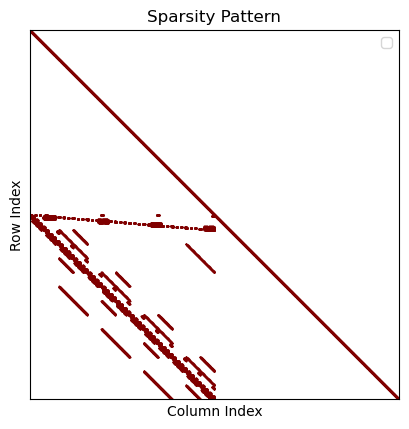

In [10]:
# Calculate sparsity
matrix = Lin_Euler_Matrix
total_elements = matrix.size
nonzero_elements = np.count_nonzero(matrix)
zero_elements = total_elements - nonzero_elements
sparsity = zero_elements / total_elements

plt.figure()
plt.spy(matrix, markersize=0.5, color='maroon')

plt.title("Sparsity Pattern")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()